In [1]:
import pandas as pd

In [2]:
df=pd.read_json('data (2).json')

In [3]:
df

,bcc,cc,received_at,events,files,from,to,reply_to,object,unread,starred,_labels,snippet,subject,body
0,[],[],2023-09-28 13:52:11,[],[],"[{'email': 'no-reply@accounts.google.com', 'na...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]",[],message,True,False,"[{'display_name': 'All Mail', 'id': '7dmj6rp7d...",Nylas Quickstart was granted access to your Go...,Security alert,"<!DOCTYPE html><html lang=""en""><head><meta nam..."
1,[],[],2023-09-28 13:51:31,[],[],"[{'email': 'no-reply@accounts.google.com', 'na...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]",[],message,True,False,"[{'display_name': 'All Mail', 'id': '7dmj6rp7d...",A new sign-in on Windows sjoseph2552@gmail.com...,Security alert,"<!DOCTYPE html><html lang=""en""><head><meta nam..."
2,[],[],2023-09-28 12:57:41,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,False,"[{'display_name': 'All Mail', 'id': '7dmj6rp7d...",GENERATIVE AI IN THE INSURANCE SECTOR As someo...,Reshaping the Insurance Field through the Impl...,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan..."
3,[],[],2023-09-28 11:27:40,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,False,"[{'display_name': 'All Mail', 'id': '7dmj6rp7d...",Tech companies are the most well positioned to...,Tech's Surprising Remote Work U-Turn,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan..."
4,[],[],2023-09-28 10:57:42,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,False,"[{'display_name': 'Inbox', 'id': '68xfa9k4c9pv...","Hey Everyone, I think the culmination of Gener...",Google DeepMind's Gemini is Arriving Soon,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,[],[],2023-09-23 19:27:42,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,False,"[{'display_name': 'All Mail', 'id': '7dmj6rp7d...","Hey, in this issue: generative AI and intellec...",Artificial Intelligence #190,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan..."
86,[],[],2023-09-23 18:14:29,[],[],"[{'email': 'linkedin@e.linkedin.com', 'name': ...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]","[{'email': 'donotreply@e.linkedin.com', 'name'...",message,True,False,"[{'display_name': 'Inbox', 'id': '68xfa9k4c9pv...",Information Technology Rules Annual Reminder ‌...,Information Technology Rules Annual Reminder,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S..."
87,[],[],2023-09-23 16:40:31,[],[],"[{'email': 'jobalerts-noreply@linkedin.com', '...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,False,"[{'display_name': 'Inbox', 'id': '68xfa9k4c9pv...",Ford Motor Company Lead Automation Engineer - ...,“automation engineer”: Ford Motor Company - Le...,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan..."
88,[],[],2023-09-23 13:55:54,[],[],"[{'email': 'no-reply@e.udemymail.com', 'name':...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]",[],message,True,False,"[{'display_name': 'Category Updates', 'id': 'c...","New Promotional Announcement Hi Samuel, an ann...",ChatGPT complete guide : Mastering Conversatio...,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01//..."


In [4]:
df.reply_to[0]

[]

In [5]:
df_g2=df.unread.value_counts().reset_index()

In [6]:
df_g2

,unread,count
0,True,90


In [7]:
import seaborn as sns

<Axes: xlabel='unread', ylabel='count'>

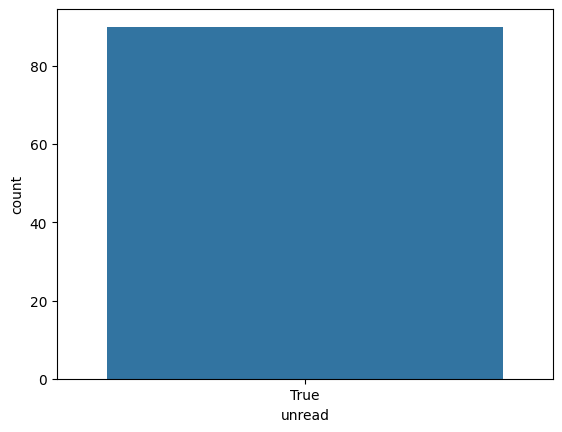

In [8]:
sns.barplot(data=df_g2,x="unread",y="count")

In [9]:
from bs4 import BeautifulSoup

In [10]:
from bs4 import BeautifulSoup

def clean(k):
    html_string = k
    soup = BeautifulSoup(html_string, 'html.parser')
    plain_text = soup.get_text().replace('"', "'")
    return plain_text

In [11]:
df["clean_content"]=df.body.apply(clean)

In [12]:
df.clean_content[1]

'A new sign-in on Windows sjoseph2552@gmail.com We noticed a new sign-in to your Google Account on a Windows device. If this was you, you don’t need to do anything. If not, we’ll help you secure your account.Check activityYou can also see security activity athttps://myaccount.google.com/notificationsYou received this email to let you know about important changes to your Google Account and services.© 2023 Google LLC, 1600 Amphitheatre Parkway, Mountain View, CA 94043, USA'

In [13]:
df["replied_to"]=df.reply_to.apply(lambda x:x[0]["email"] if x else "NO REPLY SENT")

In [14]:
df["file_type"]=df.files.apply(lambda x: x[0]["content_type"] if x else "NO ATTACHMENTS")

In [15]:
df.files[0]

[]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df["recived_day"]=df.received_at.dt.day

In [18]:
df["recived_hour"]=df.received_at.dt.hour

In [19]:
df["_labels"][0]

[{'display_name': 'All Mail',
  'id': '7dmj6rp7dh8w3nzqkh0hlc6mg',
  'name': 'all'},
 {'display_name': 'Category Updates',
  'id': 'cchmfpw98x8xdfzwoznzcohl4',
  'name': 'updates'},
 {'display_name': 'Inbox', 'id': '68xfa9k4c9pvash1ghkykx11x', 'name': 'inbox'}]

In [20]:
df.bcc.value_counts()

bcc
[]    90
Name: count, dtype: int64

In [21]:
df["from_email"]=df["from"].apply(lambda x: x[0]["email"])

In [22]:
df["from_name"]=df["from"].apply(lambda x: x[0]["name"])

In [23]:
df["email_from"]=df["from"].apply(lambda x: x[0]["email"])

In [24]:
df._labels[0]

[{'display_name': 'All Mail',
  'id': '7dmj6rp7dh8w3nzqkh0hlc6mg',
  'name': 'all'},
 {'display_name': 'Category Updates',
  'id': 'cchmfpw98x8xdfzwoznzcohl4',
  'name': 'updates'},
 {'display_name': 'Inbox', 'id': '68xfa9k4c9pvash1ghkykx11x', 'name': 'inbox'}]

In [25]:
df.from_email.value_counts()[:5]

from_email
newsletters-noreply@linkedin.com    34
no-reply@e.udemymail.com            22
invitations@linkedin.com             4
jobalerts-noreply@linkedin.com       4
team@pianote.com                     3
Name: count, dtype: int64

In [26]:
df.file_type.value_counts()

file_type
NO ATTACHMENTS     89
text/x-amp-html     1
Name: count, dtype: int64

In [27]:
df.replied_to.value_counts()[:5]

replied_to
NO REPLY SENT                80
contactus@shine.com           2
donotreply@e.linkedin.com     2
thebatch@deeplearning.ai      1
hello@deeplearning.ai         1
Name: count, dtype: int64

In [28]:
df

,bcc,cc,received_at,events,files,from,to,reply_to,object,unread,...,subject,body,clean_content,replied_to,file_type,recived_day,recived_hour,from_email,from_name,email_from
0,[],[],2023-09-28 13:52:11,[],[],"[{'email': 'no-reply@accounts.google.com', 'na...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]",[],message,True,...,Security alert,"<!DOCTYPE html><html lang=""en""><head><meta nam...",Nylas Quickstart was granted access to your Go...,NO REPLY SENT,NO ATTACHMENTS,28,13,no-reply@accounts.google.com,Google,no-reply@accounts.google.com
1,[],[],2023-09-28 13:51:31,[],[],"[{'email': 'no-reply@accounts.google.com', 'na...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]",[],message,True,...,Security alert,"<!DOCTYPE html><html lang=""en""><head><meta nam...",A new sign-in on Windows sjoseph2552@gmail.com...,NO REPLY SENT,NO ATTACHMENTS,28,13,no-reply@accounts.google.com,Google,no-reply@accounts.google.com
2,[],[],2023-09-28 12:57:41,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,...,Reshaping the Insurance Field through the Impl...,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan...",GENERATIVE AI IN THE INSURANCE S...,NO REPLY SENT,NO ATTACHMENTS,28,12,newsletters-noreply@linkedin.com,Dr. Jagrrit via LinkedIn,newsletters-noreply@linkedin.com
3,[],[],2023-09-28 11:27:40,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,...,Tech's Surprising Remote Work U-Turn,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan...",Tech companies are the most well...,NO REPLY SENT,NO ATTACHMENTS,28,11,newsletters-noreply@linkedin.com,BBC News via LinkedIn,newsletters-noreply@linkedin.com
4,[],[],2023-09-28 10:57:42,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,...,Google DeepMind's Gemini is Arriving Soon,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan...","Hey Everyone, I think the culmin...",NO REPLY SENT,NO ATTACHMENTS,28,10,newsletters-noreply@linkedin.com,Michael Spencer via LinkedIn,newsletters-noreply@linkedin.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,[],[],2023-09-23 19:27:42,[],[],"[{'email': 'newsletters-noreply@linkedin.com',...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,...,Artificial Intelligence #190,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan...","Hey, in this issue: generative A...",NO REPLY SENT,NO ATTACHMENTS,23,19,newsletters-noreply@linkedin.com,Andriy Burkov via LinkedIn,newsletters-noreply@linkedin.com
86,[],[],2023-09-23 18:14:29,[],[],"[{'email': 'linkedin@e.linkedin.com', 'name': ...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]","[{'email': 'donotreply@e.linkedin.com', 'name'...",message,True,...,Information Technology Rules Annual Reminder,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",\n\n\n\n\n\n\n\nLinkedIn\n\n\n\n\n\n\n\n\nInfo...,donotreply@e.linkedin.com,NO ATTACHMENTS,23,18,linkedin@e.linkedin.com,LinkedIn Legal,linkedin@e.linkedin.com
87,[],[],2023-09-23 16:40:31,[],[],"[{'email': 'jobalerts-noreply@linkedin.com', '...","[{'email': 'sjoseph2552@gmail.com', 'name': 'S...",[],message,True,...,“automation engineer”: Ford Motor Company - Le...,"<html xmlns=""http://www.w3.org/1999/xhtml"" lan...",Ford Motor Company Lead Automati...,NO REPLY SENT,NO ATTACHMENTS,23,16,jobalerts-noreply@linkedin.com,LinkedIn Job Alerts,jobalerts-noreply@linkedin.com
88,[],[],2023-09-23 13:55:54,[],[],"[{'email': 'no-reply@e.udemymail.com', 'name':...","[{'email': 'sjoseph2552@gmail.com', 'name': ''}]",[],message,True,...,ChatGPT complete guide : Mastering Conversatio...,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01//...",\n\n\n\n\nUdemy\n\n\n\n\n\n \n\n\n\n\n\n\n ...,NO REPLY SENT,NO ATTACHMENTS,23,13,no-reply@e.udemymail.com,Udemy Instructor: Jayanta Sarkar,no-reply@e.udemymail.com


In [29]:
df_g=df.groupby("recived_hour",as_index=False).count()[["recived_hour","received_at"]]

([<matplotlib.axis.XTick at 0x1a9d706a3b0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

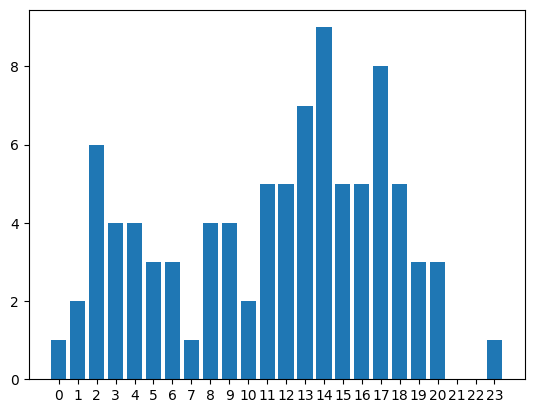

In [30]:
plt.bar(df_g.recived_hour,df_g.received_at)
plt.xticks(range(0,24),range(0,24))

([<matplotlib.axis.YTick at 0x1a9d6f9c670>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10'),
  Text(0, 11, '11'),
  Text(0, 12, '12'),
  Text(0, 13, '13'),
  Text(0, 14, '14'),
  Text(0, 15, '15'),
  Text(0, 16, '16'),
  Text(0, 17, '17'),
  Text(0, 18, '18'),
  Text(0, 19, '19'),
  Text(0, 20, '20'),
  Text(0, 21, '21'),
  Text(0, 22, '22'),
  Text(0, 23, '23')])

<Figure size 400x400 with 0 Axes>

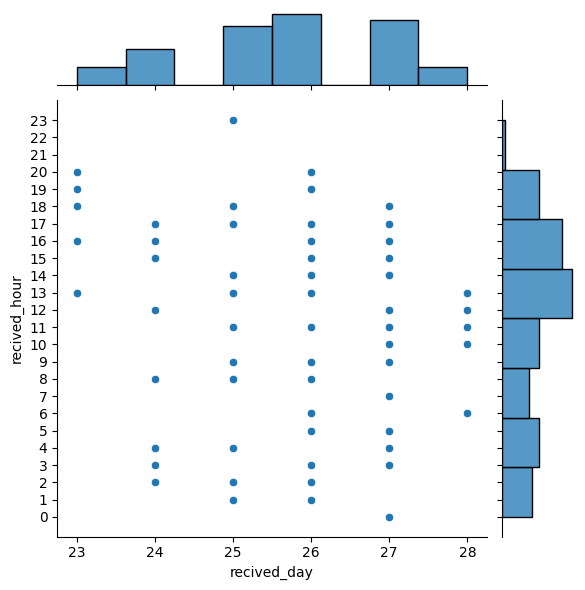

In [31]:
plt.figure(figsize=(4,4))
sns.jointplot(data=df,x="recived_day",y="recived_hour",kind="scatter")
plt.yticks(range(0,24),range(0,24))

In [32]:
df["from"][0]

[{'email': 'no-reply@accounts.google.com', 'name': 'Google'}]

In [33]:
import pdfplumber

# Open the PDF file
with pdfplumber.open(r'C:\Users\ssrin\OneDrive\Desktop\C7 Input Files\res.pdf') as pdf:
    # Initialize an empty string to store extracted text
    text = ''

    # Iterate through each page and extract text
    for page in pdf.pages:
        text += page.extract_text()

# Print or use the extracted text
print(text)

Telangana Growth Analysis
Objective:
• Explore Stamp Registration, Transportation and Ts-Ipass Datasets.
Understand their attributes, categories and time period.
• Analyze trends and patterns within each department.
• Identify growth opportunities and areas needing attention.
• Find correlation among these departments and report the overall growth of the
state through insights and relevant visuals such as shape maps.
Primary Questions:
Stamp Registration
1. How does the revenue generated from document registration vary
across districts in Telangana? List down the top 5 districts that showed
the highest document registration revenue growth between FY 2019
and 2022.
2. How does the revenue generated from document registration compare
to the revenue generated from e-stamp challans across districts? List
down the top 5 districts where e-stamps revenue contributes
significantly more to the revenue than the documents in FY 2022?
3. Is there any alteration of e-Stamp challan count and documen

In [34]:
sentences = text.split('.')

# Calculate word frequency for each word in the text
word_frequency = {}
for sentence in sentences:
    words = sentence.split()
    for word in words:
        word = word.lower()
        if word.isalnum():
            if word in word_frequency:
                word_frequency[word] += 1
            else:
                word_frequency[word] = 1

# Calculate sentence scores based on word frequency
sentence_scores = {}
for sentence in sentences:
    for word in sentence.split():
        word = word.lower()
        if word in word_frequency:
            if sentence in sentence_scores:
                sentence_scores[sentence] += word_frequency[word]
            else:
                sentence_scores[sentence] = word_frequency[word]

# Sort sentences by their scores in descending order
sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

# Extract the top N sentences for the summary
top_n = 2  # Adjust this to control the length of the summary
summary_sentences = [sentence for sentence, score in sorted_sentences[:top_n]]

# Create the summary
summary = '. '.join(summary_sentences)

# Print the summary
print(summary)

 How does the revenue generated from document registration compare
to the revenue generated from e-stamp challans across districts? List
down the top 5 districts where e-stamps revenue contributes
significantly more to the revenue than the documents in FY 2022?
3.  List down the top 3 and bottom 3 districts that have shown the highest
and lowest vehicle sales growth during FY 2022 compared to FY
2021? (Consider and compare categories: Petrol, Diesel and Electric)
Ts-Ipass (Telangana State Industrial Project Approval and Self
Certification System)
8


In [35]:
text = """
    Text summarization is the process of condensing a piece of text into a shorter, coherent version
    while retaining the most important information. It is a valuable tool for quickly understanding
    the key points of a document.
    There are two primary approaches to text summarization: extractive and abstractive.
    Extractive summarization selects and rearranges sentences from the original text, while abstractive
    summarization generates new sentences that convey the essential meaning.
    This example demonstrates extractive summarization using the Gensim library.
"""

In [36]:
text

'\n    Text summarization is the process of condensing a piece of text into a shorter, coherent version\n    while retaining the most important information. It is a valuable tool for quickly understanding\n    the key points of a document.\n    There are two primary approaches to text summarization: extractive and abstractive.\n    Extractive summarization selects and rearranges sentences from the original text, while abstractive\n    summarization generates new sentences that convey the essential meaning.\n    This example demonstrates extractive summarization using the Gensim library.\n'

In [37]:
# Tokenize the text into words
words = text.split()

# Create a dictionary to store word frequencies
word_frequency = {}

# Define a list of common words to ignore (customize as needed)
common_words_to_ignore = ["the", "of", "is", "a", "it", "for", "and", "to", "in", "this"]

# Calculate word frequencies
for word in words:
    word = word.lower()
    if word not in common_words_to_ignore:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

# Extract keywords based on word frequency
top_n_keywords = 5  # You can adjust this to get more or fewer keywords
keywords = [word for word, freq in sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)[:top_n_keywords]]

# Print the extracted keywords
print("Keywords:", keywords)

Keywords: ['summarization', 'text', 'extractive', 'while', 'sentences']


In [38]:
# Specify the path to your text file
file_path = 'Metadata.txt'  # Replace with the path to your text file

# Open and read the text file
try:
    with open(file_path, 'r') as file:
        file_contents = file.read()

    # Print the text from the file
    print("Text from the file:")
    print(file_contents)
except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Text from the file:
This file contains all the meta information regarding the columns described in the CSV files. We have provided 5 CSV files:
1. dim_districts
2. dim_date
3. fact_stamps
4. fact_transport
5. fact_TS_iPASS

---------------------------------------------------------------------------------------------

Column description for dim_districts:
The table contains information about districts.

- dist_code: This column represents the district code or identifier for each district.

- district: This column represents the name of the district.

---------------------------------------------------------------------------------------------

Column description for dim_date:
This table contains the dates at the monthly level. Please be aware that the fiscal year of Telangana spans from April to March.

- month: This column contains the starting date of each month.

- Mmm: This column contains the name of the month.

- quarter: This column contains the associated quarter for each partic